In [1]:
from datadreamer.prompt_generation import LMPromptGenerator
from datadreamer.image_generation import StableDiffusionImageGenerator, StableDiffusionTurboImageGenerator
from datadreamer.dataset_annotation import OWLv2Annotator

import matplotlib.pyplot as plt
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


/home/paperspace/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-08 16:16:46.330413: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## Prompt generation

In [2]:
# Define objects you want to generate
object_names = ["aeroplane", "car", "person", "unicorn"]
prompt_generator = LMPromptGenerator(
    class_names=object_names,
    prompts_number=10,
    num_objects_range = [1, 2], # How many objects included in a prompt
    seed = 42,
)

Loading language model...


Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:08<00:00,  4.12s/it]


Done!


In [3]:
# Generate prompts using Language model
generated_prompts = prompt_generator.generate_prompts()
print(generated_prompts)

Generating prompts: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.22s/it]

[(['aeroplane'], 'A photo of an aeroplane soaring over a cityscape at sunset, casting a golden glow over the rooftops and creating a stunning backdrop for the bustling metropolis below.'), (['car', 'aeroplane'], 'A photo of a car and an aeroplane soaring above it in the sky, creating an awe-inspiring scene atop a mountain road.'), (['aeroplane'], 'A photo of aeroplane soaring in flight over rolling hills.'), (['unicorn'], 'A photo of a unicorn grazing in a lush pasture, surrounded by colorful flowers, and two butterflies dancing in the background.'), (['aeroplane'], 'A photo of an aeroplane taking off into the sunset, overlooking the city skyline.'), (['car'], 'A photo of a car driving through a peaceful forest, surrounded by lush greenery and the sounds of nature. Peaceful and serene.'), (['aeroplane'], 'A photo of an aeroplane soaring majestically over a serene countryside, leaving behind a trail of white vapor as it climbs up into the beautiful blue sky.'), (['unicorn'], 'A photo of

In [4]:
prompt_generator.release(empty_cuda_cache=True)

## Image generation

In [5]:
# Initialize the image generator, optionally try different prompt_prefix, prompt_suffix and negative_prompt
image_generator = StableDiffusionTurboImageGenerator(
    seed = 42.0,
    #prompt_prefix =  "",
    #prompt_suffix = ", hd, 8k, highly detailed",
    #negative_prompt= "cartoon, blue skin, painting, scrispture, golden, illustration, worst quality, low quality, normal quality:2, unrealistic dream, low resolution,  static, sd character, low quality, low resolution, greyscale, monochrome, nose, cropped, lowres, jpeg artifacts, deformed iris, deformed pupils, bad eyes, semi-realistic worst quality, bad lips, deformed mouth, deformed face, deformed fingers, bad anatomy",
)

The config attributes {'feature_extractor': [None, None], 'image_encoder': [None, None]} were passed to StableDiffusionXLPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'feature_extractor': [None, None], 'image_encoder': [None, None]} are not expected by StableDiffusionXLPipeline and will be ignored.
Loading pipeline components...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]


In [6]:
prompts = [p[1] for p in generated_prompts]
prompt_objects = [p[0] for p in generated_prompts]

In [7]:
# Generate images from the generated prompts
generated_images = list(image_generator.generate_images(prompts))

Generating images:   0%|                                                                                                                                                                                                                                                                     | 0/10 [00:00<?, ?it/s]

A photo of an aeroplane soaring over a cityscape at sunset, casting a golden glow over the rooftops and creating a stunning backdrop for the bustling metropolis below., hd, 8k, highly detailed



Generating images:  10%|█████████████████████████▎                                                                                                                                                                                                                                   | 1/10 [00:07<01:06,  7.44s/it]

A photo of a car and an aeroplane soaring above it in the sky, creating an awe-inspiring scene atop a mountain road., hd, 8k, highly detailed



Generating images:  20%|██████████████████████████████████████████████████▌                                                                                                                                                                                                          | 2/10 [00:09<00:36,  4.53s/it]

A photo of aeroplane soaring in flight over rolling hills., hd, 8k, highly detailed



Generating images:  30%|███████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                 | 3/10 [00:12<00:23,  3.41s/it]

A photo of a unicorn grazing in a lush pasture, surrounded by colorful flowers, and two butterflies dancing in the background., hd, 8k, highly detailed



Generating images:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                       | 4/10 [00:14<00:17,  2.90s/it]

A photo of an aeroplane taking off into the sunset, overlooking the city skyline., hd, 8k, highly detailed



Generating images:  50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                              | 5/10 [00:16<00:13,  2.60s/it]

A photo of a car driving through a peaceful forest, surrounded by lush greenery and the sounds of nature. Peaceful and serene., hd, 8k, highly detailed



Generating images:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 6/10 [00:18<00:09,  2.42s/it]

A photo of an aeroplane soaring majestically over a serene countryside, leaving behind a trail of white vapor as it climbs up into the beautiful blue sky., hd, 8k, highly detailed



Generating images:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 7/10 [00:20<00:06,  2.31s/it]

A photo of a majestic unicorn grazing in a lush, green meadow under a crystal-clear sky. Its surrounded by vibrant wildflowers that are swaying gently in the breeze. In the background, you can see a sparkling river and towering trees. The serene beauty of nature is captured in, hd, 8k, highly detailed



Generating images:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 8/10 [00:22<00:04,  2.24s/it]

A photo of a majestic unicorn galloping through a mystical forest, surrounded by rainbow-colored flowers and glistening sprites. In the background, a magical castle looms tall, hinting at the unicorns royal heritage. This scene captures the beauty and wonder of unicorn magic in a, hd, 8k, highly detailed



Generating images:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 9/10 [00:24<00:02,  2.18s/it]

A photo of an unicorn boarding an aeroplane, ready for takeoff into a world full of wonders!, hd, 8k, highly detailed



Generating images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:26<00:00,  2.66s/it]


(['aeroplane'], 'A photo of an aeroplane soaring over a cityscape at sunset, casting a golden glow over the rooftops and creating a stunning backdrop for the bustling metropolis below.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA0DCB2670>


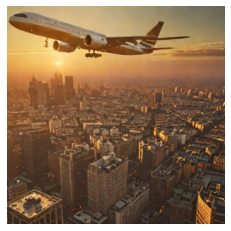

(['car', 'aeroplane'], 'A photo of a car and an aeroplane soaring above it in the sky, creating an awe-inspiring scene atop a mountain road.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA140CBA30>


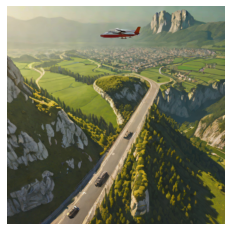

(['aeroplane'], 'A photo of aeroplane soaring in flight over rolling hills.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA0D71D0D0>


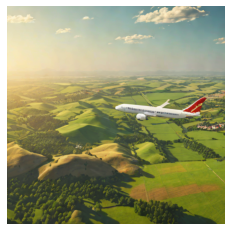

(['unicorn'], 'A photo of a unicorn grazing in a lush pasture, surrounded by colorful flowers, and two butterflies dancing in the background.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA0DCB2EB0>


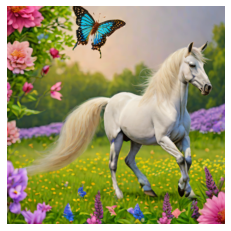

(['aeroplane'], 'A photo of an aeroplane taking off into the sunset, overlooking the city skyline.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA0D71D160>


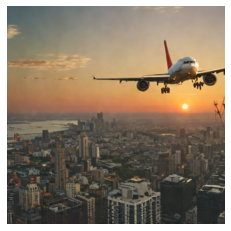

(['car'], 'A photo of a car driving through a peaceful forest, surrounded by lush greenery and the sounds of nature. Peaceful and serene.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA0D71D190>


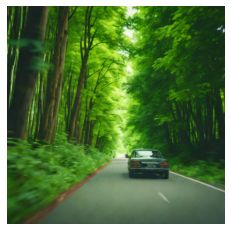

(['aeroplane'], 'A photo of an aeroplane soaring majestically over a serene countryside, leaving behind a trail of white vapor as it climbs up into the beautiful blue sky.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA0D71D370>


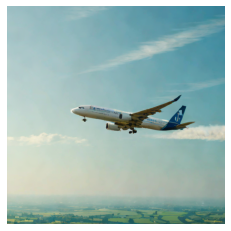

(['unicorn'], 'A photo of a majestic unicorn grazing in a lush, green meadow under a crystal-clear sky. Its surrounded by vibrant wildflowers that are swaying gently in the breeze. In the background, you can see a sparkling river and towering trees. The serene beauty of nature is captured in')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA0D71D280>


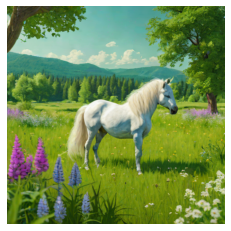

(['unicorn'], 'A photo of a majestic unicorn galloping through a mystical forest, surrounded by rainbow-colored flowers and glistening sprites. In the background, a magical castle looms tall, hinting at the unicorns royal heritage. This scene captures the beauty and wonder of unicorn magic in a')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA0D71D790>


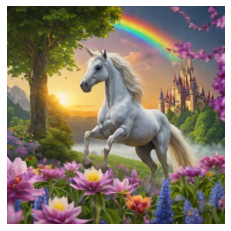

(['aeroplane', 'unicorn'], 'A photo of an unicorn boarding an aeroplane, ready for takeoff into a world full of wonders!')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FAA0D71D6A0>


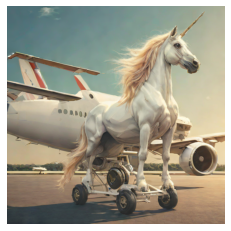

In [8]:
# Visualize images
for img, prompt in zip(generated_images, generated_prompts):
    print(prompt)
    plt.imshow(img)
    print(img)
    plt.axis("off")  # Hide the axis
    plt.show()


In [12]:
image_generator.release(empty_cuda_cache=True)

In [13]:
annotator = OWLv2Annotator(
    seed=42,
    device="cuda",  # Use "cuda" for GPU or "cpu" for CPU
)

Box: [      4.061      16.851       431.9      123.32], Score: 0.7602606415748596, Label: aeroplane


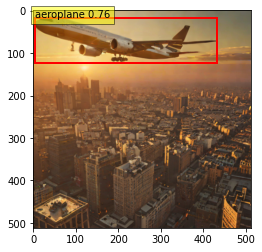

Box: [     218.02      48.358      313.43      77.432], Score: 0.6879537105560303, Label: aeroplane
Box: [     140.61      467.78      170.19      498.93], Score: 0.3653983473777771, Label: car
Box: [     272.98      292.99      295.05      312.57], Score: 0.28925618529319763, Label: car
Box: [     205.11       386.7      238.25      424.69], Score: 0.2758326530456543, Label: car


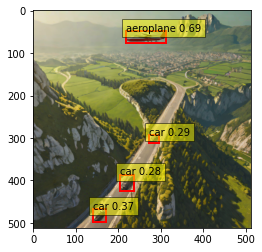

Box: [     256.51      213.09       466.1      271.07], Score: 0.7031733393669128, Label: aeroplane


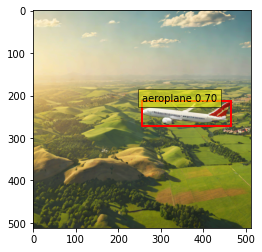

Box: [       29.9      77.632      480.89      458.74], Score: 0.5106067657470703, Label: unicorn


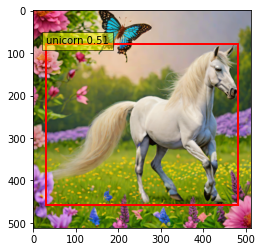

Box: [     197.21      79.041      513.93      205.79], Score: 0.7679218053817749, Label: aeroplane


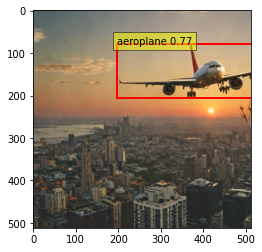

Box: [     278.65       335.5      381.62      405.68], Score: 0.42878976464271545, Label: car


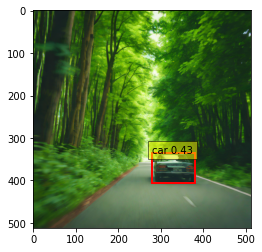

Box: [     151.11      206.67      442.44      300.87], Score: 0.7748064398765564, Label: aeroplane


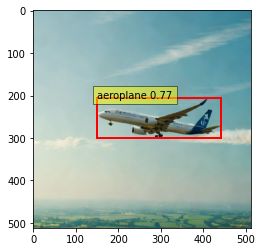

Box: [     137.95      168.46       399.1      398.33], Score: 0.41029414534568787, Label: unicorn


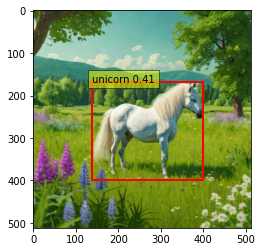

Box: [     169.88      93.095      456.45      433.61], Score: 0.6865194439888, Label: unicorn
Box: [     45.153      316.05      85.919      361.13], Score: 0.20563624799251556, Label: unicorn


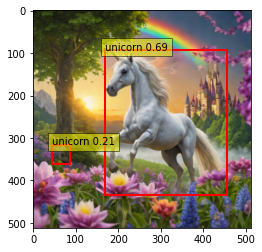

Box: [     115.59      21.613      459.18      448.22], Score: 0.5115137100219727, Label: unicorn
Box: [     3.7047      26.937      507.99      490.53], Score: 0.47663140296936035, Label: aeroplane
Box: [      58.97       377.4      96.089      394.74], Score: 0.29386356472969055, Label: aeroplane


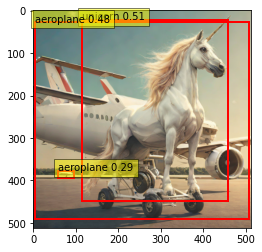

In [14]:
boxes_list = []
scores_list = []
labels_list = []

# Annotate images using OWLv2
for image, prompt_objs in zip(generated_images, prompt_objects):
    # Define prompts to guide the detection
    prompts = prompt_objs

    # Perform object detection
    boxes, scores, labels = annotator.annotate(image, prompts, conf_threshold=0.2, use_tta=True)

    # Convert to numpy arrays
    if not isinstance(boxes, np.ndarray):
        boxes = boxes.detach().cpu().numpy()
    if not isinstance(scores, np.ndarray):
        scores = scores.detach().cpu().numpy()
    if not isinstance(labels, np.ndarray):
        labels = labels.detach().cpu().numpy()

    # Process the results
    for box, score, label in zip(boxes, scores, labels):
        if isinstance(label, np.int64):
            print(f"Box: {box}, Score: {score}, Label: {prompts[label]}")
        else:
            print(f"Box: {box}, Score: {score}, Label: {label}")


    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Iterate over each detection
    for box, score, label in zip(boxes, scores, labels):
        # Each box is (x1, y1, x2, y2)
        x1, y1, x2, y2 = box
        width, height = x2 - x1, y2 - y1
        rect = patches.Rectangle(
            (x1, y1), width, height, linewidth=2, edgecolor="r", facecolor="none"
        )
        ax.add_patch(rect)

        if isinstance(label, np.int64):
            label = prompts[label]

        plt.text(
            x1,
            y1,
            f"{label} {score:.2f}",
            bbox=dict(facecolor="yellow", alpha=0.5),
        )

    plt.show()